# Implement Edge detection on Image

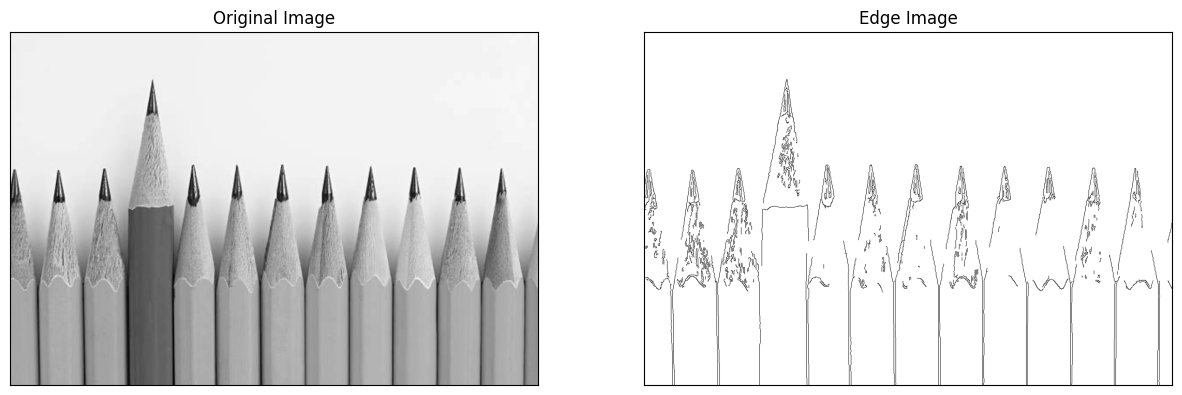

In [67]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

# Load the image
image_path = "test2.png"
original_image = cv2.imread(image_path, cv2.IMREAD_GRAYSCALE)

# Perform Canny edge detection
edges =255- cv2.Canny(original_image, threshold1=100, threshold2=200)  # Adjust thresholds as needed

plt.figure(figsize=(15,10))
plt.subplot(121), plt.imshow(original_image, cmap='gray')
plt.title('Original Image'), plt.xticks([]), plt.yticks([])

plt.subplot(122), plt.imshow(edges, cmap='gray')
plt.title('Edge Image'), plt.xticks([]), plt.yticks([])

plt.show()


1/1 [==============================] - 0s 128ms/step


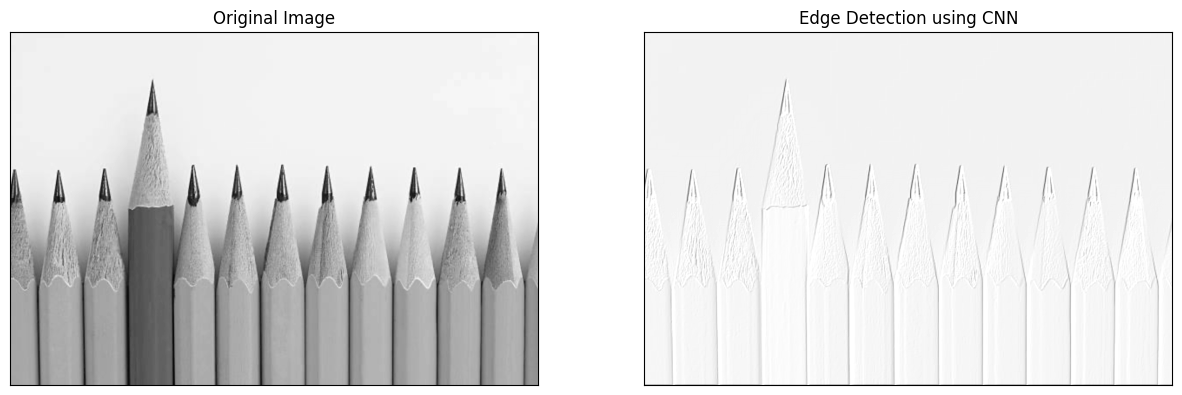

In [65]:
import numpy as np
import matplotlib.pyplot as plt
import cv2
from keras.models import Sequential
from keras.layers import Conv2D

# Load the image
image_path = "test2.png"
original_image = cv2.imread(image_path, cv2.IMREAD_GRAYSCALE)

# Normalize the image to values between 0 and 1
normalized_image = original_image / 255.0

# Reshape the image to match CNN input shape (height, width, channels)
normalized_image = normalized_image.reshape((1, normalized_image.shape[0], normalized_image.shape[1], 1))

# Define a simple CNN for edge detection
model = Sequential()
model.add(Conv2D(1, (3, 3), activation='relu', padding='same', input_shape=(normalized_image.shape[1], normalized_image.shape[2], 1)))

# Apply the model to the normalized image to get edge-detected image
edges = model.predict(normalized_image)

# Reshape the output to remove the batch and channel dimensions
edges =255- edges.reshape((normalized_image.shape[1], normalized_image.shape[2]))

plt.figure(figsize=(15,10))
plt.subplot(121), plt.imshow(original_image, cmap='gray')
plt.title('Original Image'), plt.xticks([]), plt.yticks([])

plt.subplot(122), plt.imshow(edges, cmap='gray')
plt.title('Edge Detection using CNN'), plt.xticks([]), plt.yticks([])

plt.show()


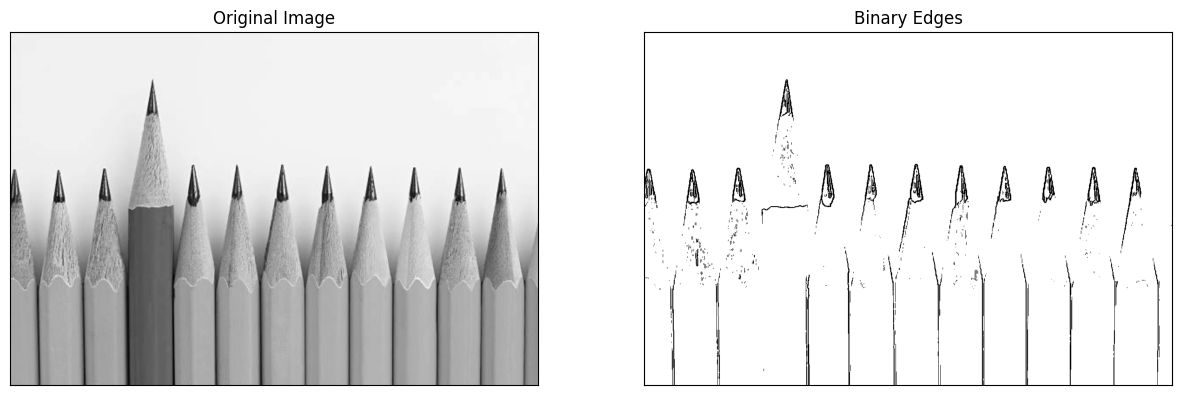

In [24]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

# Load the image
image_path = "test2.png"
original_image = cv2.imread(image_path, cv2.IMREAD_GRAYSCALE)

# Apply Sobel edge detection kernel
sobel_x = cv2.Sobel(original_image, cv2.CV_64F, 1, 0, ksize=3)
sobel_y = cv2.Sobel(original_image, cv2.CV_64F, 0, 1, ksize=3)

# Combine the absolute value of the gradients (edges in x and y directions)
edge_magnitude = np.sqrt(sobel_x**2 + sobel_y**2)

# Normalize the edge magnitude to range [0, 255] and obtain negative
edge_magnitude_normalized =255- cv2.normalize(edge_magnitude, None, 0, 255, cv2.NORM_MINMAX)

# Convert edge magnitude to uint8 (required for binary thresholding)
edge_magnitude_uint8 = np.uint8(edge_magnitude_normalized)

ret, edges_binary = cv2.threshold(edge_magnitude_uint8, 200, 255, cv2.THRESH_BINARY)
plt.figure(figsize=(15,10))
# Plot the original image, edge magnitude, and binary edges
plt.subplot(121), plt.imshow(original_image, cmap='gray')
plt.title('Original Image'), plt.xticks([]), plt.yticks([])

plt.subplot(122), plt.imshow(edges_binary, cmap='gray')
plt.title('Binary Edges'), plt.xticks([]), plt.yticks([])

plt.show()
